In [1]:
# Import libraries
import pandas as pd
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, RocCurveDisplay
import matplotlib.pyplot as plt

In [2]:
# Load processed data
X_train, X_test, y_train, y_test = joblib.load(r"C:\Users\Asus\Documents\GitHub\Credit-Scoring\output\models\train_test_split_balanced.pkl")

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (452296, 64)
Test size: (61503, 64)


In [3]:
# Train Logistic Regression model
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced', 
    solver='lbfgs'
)

model.fit(X_train, y_train)
print("Model training completed.")

Model training completed.


In [4]:
# Evaluate model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)

print(f"\nROC-AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, digits=3))


ROC-AUC: 0.6599
F1 Score: 0.2100

📋 Classification Report:
              precision    recall  f1-score   support

           0      0.947     0.649     0.770     56538
           1      0.128     0.586     0.210      4965

    accuracy                          0.644     61503
   macro avg      0.537     0.618     0.490     61503
weighted avg      0.881     0.644     0.725     61503



In [5]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Pred 0', 'Pred 1'])
print("\nConfusion Matrix:")
print(cm_df)


Confusion Matrix:
          Pred 0  Pred 1
Actual 0   36709   19829
Actual 1    2056    2909


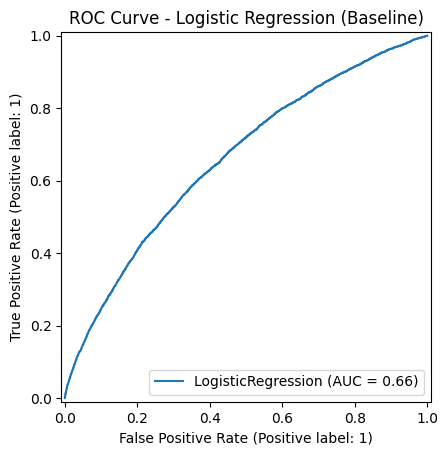

In [6]:
#ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression (Baseline)")
plt.show()

In [7]:
#Save the model
joblib.dump(model, r"C:\Users\Asus\Documents\GitHub\Credit-Scoring\output\models\logistic_regression_baseline_model.pkl")

['C:\\Users\\Asus\\Documents\\GitHub\\Credit-Scoring\\output\\models\\logistic_regression_baseline_model.pkl']